In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Datos_de_Mexicocity_sin_nulos.csv')

In [3]:
#Verificamos informacion del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10523 entries, 0 to 10522
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    10523 non-null  int64  
 1   last_scraped                                  10523 non-null  object 
 2   source                                        10523 non-null  object 
 3   description                                   10523 non-null  object 
 4   neighborhood_overview                         10523 non-null  object 
 5   host_name                                     10523 non-null  object 
 6   host_since                                    10523 non-null  object 
 7   host_response_time                            10523 non-null  object 
 8   host_acceptance_rate                          10523 non-null  object 
 9   host_is_superhost                             10523 non-null 

In [4]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0                                      0
last_scraped                                    0
source                                          0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_since                                      0
host_response_time                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0


In [5]:
#Eliminamos la columna Unnamed.
data = data.drop('Unnamed: 0', axis=1)

In [6]:
#Verificamos informacion del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10523 entries, 0 to 10522
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  10523 non-null  object 
 1   source                                        10523 non-null  object 
 2   description                                   10523 non-null  object 
 3   neighborhood_overview                         10523 non-null  object 
 4   host_name                                     10523 non-null  object 
 5   host_since                                    10523 non-null  object 
 6   host_response_time                            10523 non-null  object 
 7   host_acceptance_rate                          10523 non-null  object 
 8   host_is_superhost                             10523 non-null  object 
 9   host_neighbourhood                            10523 non-null 

In [7]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas= data.iloc[ : , np.r_[15, 16, 21, 22, 31, 32, 38:43, 49]]
cualitativas= data.iloc[ : , np.r_[0:14, 17:20, 23:30, 33:37, 44:48]]

<Figure size 1500x800 with 0 Axes>

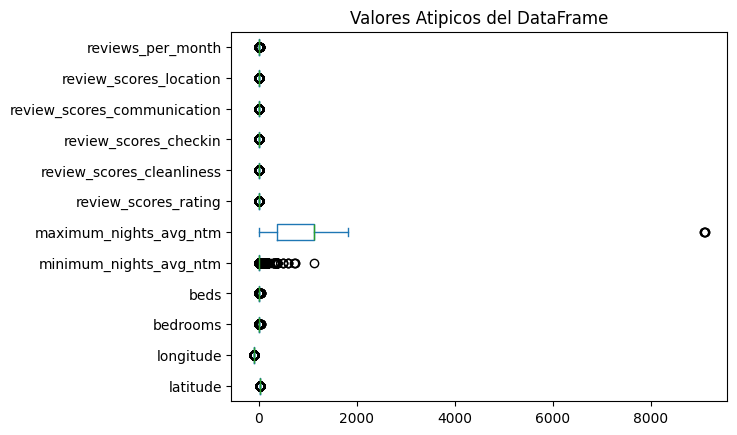

In [8]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atipicos del DataFrame")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "DESVIACION ESTANDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME**

In [9]:
#Metodo aplicando desviacion estandar. Encuentro los valores extremos
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido latitude                         19.537810
longitude                       -99.062904
bedrooms                          5.625491
beds                              6.973976
minimum_nights_avg_ntm          107.118868
maximum_nights_avg_ntm         2237.550367
review_scores_rating              5.591303
review_scores_cleanliness         5.611237
review_scores_checkin             5.562380
review_scores_communication       5.596104
review_scores_location            5.542822
reviews_per_month                 5.977017
dtype: float64
Limite inferior permitido latitude                        19.260700
longitude                      -99.273135
bedrooms                        -2.602969
beds                            -3.369301
minimum_nights_avg_ntm         -94.470156
maximum_nights_avg_ntm        -508.472386
review_scores_rating             3.959899
review_scores_cleanliness        3.943797
review_scores_checkin            4.159824
review_scores_communication      4.1064

In [10]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,latitude,longitude,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
0,19.383820,NaN,1.0,1.0,1.0,7.0,4.80,4.80,4.80,4.80,4.80,0.00
1,19.411620,-99.177940,5.0,1.0,1.0,365.0,4.58,4.70,4.87,4.78,4.98,0.41
2,19.411520,-99.168570,2.0,2.0,2.0,30.0,4.90,4.75,4.94,4.92,4.98,0.31
3,19.356140,-99.163080,1.0,1.0,3.7,180.0,4.91,4.96,4.96,4.98,4.96,0.83
4,19.432110,-99.193270,1.0,1.0,1.0,1125.0,4.91,5.00,5.00,4.73,4.91,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...
10518,19.377910,-99.180680,2.0,2.0,1.0,15.0,4.80,4.80,4.80,4.80,4.80,0.00
10519,19.307530,-99.179580,1.0,0.0,2.0,1125.0,4.40,4.30,4.60,4.50,5.00,0.27
10520,19.416820,-99.173820,2.0,3.0,2.0,1125.0,4.99,4.96,4.91,4.92,4.99,3.79
10521,19.309357,-99.146278,2.0,2.0,1.0,1125.0,4.57,4.73,4.52,4.63,4.32,3.99


In [11]:
#Corroboramos valores nulos del dataframe
valores_nulos=data3.isnull().sum()
valores_nulos

latitude                       103
longitude                      250
bedrooms                       101
beds                           135
minimum_nights_avg_ntm          98
maximum_nights_avg_ntm           4
review_scores_rating           109
review_scores_cleanliness      123
review_scores_checkin          125
review_scores_communication    144
review_scores_location         151
reviews_per_month              151
dtype: int64

In [12]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Reemplazamos una copia del dataframe
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.mean(),1))
data_clean

,latitude,longitude,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
0,19.383820,-99.200000,1.0,1.0,1.0,7.0,4.80,4.80,4.80,4.80,4.80,0.00
1,19.411620,-99.177940,5.0,1.0,1.0,365.0,4.58,4.70,4.87,4.78,4.98,0.41
2,19.411520,-99.168570,2.0,2.0,2.0,30.0,4.90,4.75,4.94,4.92,4.98,0.31
3,19.356140,-99.163080,1.0,1.0,3.7,180.0,4.91,4.96,4.96,4.98,4.96,0.83
4,19.432110,-99.193270,1.0,1.0,1.0,1125.0,4.91,5.00,5.00,4.73,4.91,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...
10518,19.377910,-99.180680,2.0,2.0,1.0,15.0,4.80,4.80,4.80,4.80,4.80,0.00
10519,19.307530,-99.179580,1.0,0.0,2.0,1125.0,4.40,4.30,4.60,4.50,5.00,0.27
10520,19.416820,-99.173820,2.0,3.0,2.0,1125.0,4.99,4.96,4.91,4.92,4.99,3.79
10521,19.309357,-99.146278,2.0,2.0,1.0,1125.0,4.57,4.73,4.52,4.63,4.32,3.99


In [13]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

latitude                       0
longitude                      0
bedrooms                       0
beds                           0
minimum_nights_avg_ntm         0
maximum_nights_avg_ntm         0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
reviews_per_month              0
dtype: int64

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [16]:
#Metodo aplicando Cuartiles. Encuentro cuartiles 0:25 y 0:75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido latitude                         19.515777
longitude                       -99.113157
bedrooms                          3.500000
beds                              3.500000
minimum_nights_avg_ntm            6.000000
maximum_nights_avg_ntm         2265.000000
review_scores_rating              5.205000
review_scores_cleanliness         5.205000
review_scores_checkin             5.225000
review_scores_communication       5.250000
review_scores_location            5.225000
reviews_per_month                 4.250000
dtype: float64
Limite inferior permitido latitude                        19.290150
longitude                      -99.220537
bedrooms                        -0.500000
beds                            -0.500000
minimum_nights_avg_ntm          -2.000000
maximum_nights_avg_ntm        -775.000000
review_scores_rating             4.445000
review_scores_cleanliness        4.445000
review_scores_checkin            4.545000
review_scores_communication      4.5300

In [17]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,latitude,longitude,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
0,19.383820,NaN,1.0,1.0,1.0,7.0,4.80,4.80,4.80,4.80,4.80,0.00
1,19.411620,-99.177940,NaN,1.0,1.0,365.0,4.58,4.70,4.87,4.78,4.98,0.41
2,19.411520,-99.168570,2.0,2.0,2.0,30.0,4.90,4.75,4.94,4.92,4.98,0.31
3,19.356140,-99.163080,1.0,1.0,3.7,180.0,4.91,4.96,4.96,4.98,4.96,0.83
4,19.432110,-99.193270,1.0,1.0,1.0,1125.0,4.91,5.00,5.00,4.73,4.91,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...
10518,19.377910,-99.180680,2.0,2.0,1.0,15.0,4.80,4.80,4.80,4.80,4.80,0.00
10519,19.307530,-99.179580,1.0,0.0,2.0,1125.0,NaN,NaN,4.60,NaN,5.00,0.27
10520,19.416820,-99.173820,2.0,3.0,2.0,1125.0,4.99,4.96,4.91,4.92,4.99,3.79
10521,19.309357,-99.146278,2.0,2.0,1.0,1125.0,4.57,4.73,NaN,4.63,NaN,3.99


In [18]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

latitude                        328
longitude                      1111
bedrooms                        303
beds                            883
minimum_nights_avg_ntm         1025
maximum_nights_avg_ntm            4
review_scores_rating            617
review_scores_cleanliness       676
review_scores_checkin           372
review_scores_communication     467
review_scores_location          496
reviews_per_month               488
dtype: int64

In [19]:
#Reemplazamos valores atipicos (nulos) del dataframe con "mean"
#Reemplazamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,latitude,longitude,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
0,19.383820,-99.200000,1.0,1.0,1.0,7.0,4.80,4.80,4.80,4.80,4.80,0.00
1,19.411620,-99.177940,1.4,1.0,1.0,365.0,4.58,4.70,4.87,4.78,4.98,0.41
2,19.411520,-99.168570,2.0,2.0,2.0,30.0,4.90,4.75,4.94,4.92,4.98,0.31
3,19.356140,-99.163080,1.0,1.0,3.7,180.0,4.91,4.96,4.96,4.98,4.96,0.83
4,19.432110,-99.193270,1.0,1.0,1.0,1125.0,4.91,5.00,5.00,4.73,4.91,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...
10518,19.377910,-99.180680,2.0,2.0,1.0,15.0,4.80,4.80,4.80,4.80,4.80,0.00
10519,19.307530,-99.179580,1.0,0.0,2.0,1125.0,4.80,4.80,4.60,4.90,5.00,0.27
10520,19.416820,-99.173820,2.0,3.0,2.0,1125.0,4.99,4.96,4.91,4.92,4.99,3.79
10521,19.309357,-99.146278,2.0,2.0,1.0,1125.0,4.57,4.73,4.90,4.63,4.90,3.99


In [20]:
#Unimos el dataframe cuantitativos limpios con el dataframe cualitativo
Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,last_scraped,source,description,neighborhood_overview,host_name,host_since,host_response_time,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,reviews_per_month
0,9/25/2024,city scrape,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",Dici,6/28/2010,a few days or more,0.9,f,Unknown,...,1.0,1.0,1.0,7.0,4.80,4.80,4.80,4.80,4.80,0.00
1,9/26/2024,previous scrape,A new concept of hosting in mexico through a b...,No overview available,Fernando,8/9/2010,within an hour,93%,t,Condesa,...,1.4,1.0,1.0,365.0,4.58,4.70,4.87,4.78,4.98,0.41
2,9/26/2024,city scrape,"Comfortably furnished, sunny, 2 bedroom apt., ...",No overview available,Nicholas,1/4/2011,within an hour,57%,t,HipÃ³dromo,...,2.0,2.0,2.0,30.0,4.90,4.75,4.94,4.92,4.98,0.31
3,9/25/2024,city scrape,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,Trisha,8/24/2010,within a few hours,100%,t,CoyoacÃ¡n,...,1.0,1.0,3.7,180.0,4.91,4.96,4.96,4.98,4.96,0.83
4,9/25/2024,city scrape,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",Andrea,4/27/2011,within an hour,100%,t,Polanco,...,1.0,1.0,1.0,1125.0,4.91,5.00,5.00,4.73,4.91,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10518,9/25/2024,city scrape,"Enjoy the simplicity of this quiet, central ho...",The neighborhood is within the old town of Mix...,Carlos,9/13/2021,a few days or more,0%,f,Unknown,...,2.0,2.0,1.0,15.0,4.80,4.80,4.80,4.80,4.80,0.00
10519,9/25/2024,city scrape,Beautiful new apartment in front of the UNAM a...,No overview available,Patricia,11/28/2019,within an hour,100%,f,Unknown,...,1.0,0.0,2.0,1125.0,4.80,4.80,4.60,4.90,5.00,0.27
10520,9/25/2024,city scrape,"Stay in the best location in La Condesa, just ...",No overview available,MarÃ­a Fernanda,7/20/2016,within an hour,100%,0,Unknown,...,2.0,3.0,2.0,1125.0,4.99,4.96,4.91,4.92,4.99,3.79
10521,9/25/2024,city scrape,Enjoy in this quiet and elegant space in the S...,It is the town of Santa Ursula Coapa in which ...,Israel,9/13/2021,within an hour,99%,f,Unknown,...,2.0,2.0,1.0,1125.0,4.57,4.73,4.90,4.63,4.90,3.99


In [21]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

last_scraped                                    0
source                                          0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_since                                      0
host_response_time                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_total_listings_count                       0
host_verifications                              0
host_has_profile_pic                            0
host_identity_verified                          0
property_type                                   0
room_type                                       0
accommodates                                    0
amenities                                       0
price                                           0
minimum_nights                                  0


In [22]:
#Convertir DataFrame
Datos_limpios.to_csv("Datos_limpios_Mexico_City.csv")